In [2]:
import os
import sys
import requests_cache
# Import Code modules
module_path = os.path.abspath(os.path.join('../code'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# Con'd import
from data_fetcher import DataFetcher
from endpoint_type import EndpointType
from db_connector import DBConnector
from flusurv_params import *
from fluview_params import *
from gft_params import *

db_connector = DBConnector()

By selecting location from FLUSURV dataset, we can see that there are three states: Califronia, Colorado, and Oregon.

2020 Data of California

In [97]:
flusurv_param = FluSurvParams(
    epiweeks = ["202001-202017"], 
    regions = [FluSurvRegion.CA]
)
flusurv=DataFetcher.fetch(EndpointType.FLUSURV,param=flusurv_param)
flusurv

,release_date,location,issue,epiweek,lag,rate_age_0,rate_age_1,rate_age_2,rate_age_3,rate_age_4,rate_overall
0,2020-11-06,CA,202044,202001,43,8.6,0.8,1.5,5.7,15.3,4.7
1,2020-11-06,CA,202044,202002,42,4.0,1.2,1.2,5.2,17.4,4.6
2,2020-11-06,CA,202044,202003,41,3.5,1.5,2.6,5.2,12.0,4.4
3,2020-11-06,CA,202044,202004,40,1.5,2.1,1.7,5.5,17.6,4.9
4,2020-11-06,CA,202044,202005,39,3.5,1.5,1.5,5.9,13.0,4.2
5,2020-11-06,CA,202044,202006,38,4.0,1.7,1.3,5.2,14.4,4.3
6,2020-11-06,CA,202044,202007,37,2.0,1.7,1.4,6.5,12.7,4.2
7,2020-11-06,CA,202044,202008,36,5.5,1.0,1.2,5.7,14.8,4.3
8,2020-11-06,CA,202044,202009,35,1.5,0.6,1.7,4.6,11.3,3.5
9,2020-11-06,CA,202044,202010,34,3.0,0.4,0.6,3.2,8.4,2.4


In [98]:
flusuraverage=flusurv.sum()[['rate_age_0','rate_age_1','rate_age_2','rate_age_3','rate_age_4']]/17
flusuraverage

rate_age_0    2.329412
rate_age_1    0.805882
rate_age_2    0.958824
rate_age_3    3.276471
rate_age_4    8.441176
dtype: object

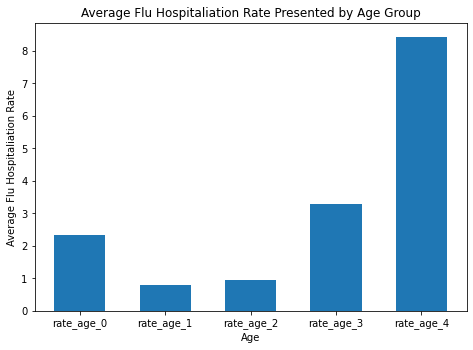

In [99]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = ['rate_age_0','rate_age_1','rate_age_2','rate_age_3','rate_age_4']
average_rate  = [2.329412,0.805882,0.958824,3.276471,8.441176]
plt.bar(age, average_rate,
        width = 0.6)
plt.xlabel("Age")
plt.ylabel("Average Flu Hospitaliation Rate")
plt.title("Average Flu Hospitaliation Rate Presented by Age Group")
plt.show()

In this section, we will look at how average influenza hospitalization rates distribute in different age group in California. The data, FluSurv, will be used to explore this question. Weekly rates of influenza virus positive specimens correspond to "rate_age_0", "rate_age_1", "rate_age_2", "rate_age_3" and "rate_age_4" by age groups of "0-4 years", "5-24 years", "25-50 years", "51-64 years" and "≥65 years". Since, this data contains only 17 weeks, we chose "202001-202017" as the time range and used FluSurvRegion.CA to extract the data for California. Then, we found the average influenza hospitalization rate for different age groups over the 17 weeks by summing the influenza hospitalization rates and dividing by 17. After doing this, we used matplotlib to plot the bar chat. From the above graph, we can see that the highest mean influenza Hospitalization Rate is for people over 65 years old at 8.441176, while the lowest mean influenza hospitalization rate is for people between 5-24 years old at 0.805882, but age group "25-50 years" has a close number 0.958824.

In [100]:
flusurvCA=flusurv.drop(['release_date','location','issue','lag','epiweek'], axis = 1)
flusurvCA

,rate_age_0,rate_age_1,rate_age_2,rate_age_3,rate_age_4,rate_overall
0,8.6,0.8,1.5,5.7,15.3,4.7
1,4.0,1.2,1.2,5.2,17.4,4.6
2,3.5,1.5,2.6,5.2,12.0,4.4
3,1.5,2.1,1.7,5.5,17.6,4.9
4,3.5,1.5,1.5,5.9,13.0,4.2
5,4.0,1.7,1.3,5.2,14.4,4.3
6,2.0,1.7,1.4,6.5,12.7,4.2
7,5.5,1.0,1.2,5.7,14.8,4.3
8,1.5,0.6,1.7,4.6,11.3,3.5
9,3.0,0.4,0.6,3.2,8.4,2.4


array([<AxesSubplot:xlabel='epiweeks', ylabel='average rates'>,
       <AxesSubplot:xlabel='epiweeks', ylabel='average rates'>,
       <AxesSubplot:xlabel='epiweeks', ylabel='average rates'>,
       <AxesSubplot:xlabel='epiweeks', ylabel='average rates'>,
       <AxesSubplot:xlabel='epiweeks', ylabel='average rates'>,
       <AxesSubplot:xlabel='epiweeks', ylabel='average rates'>],
      dtype=object)

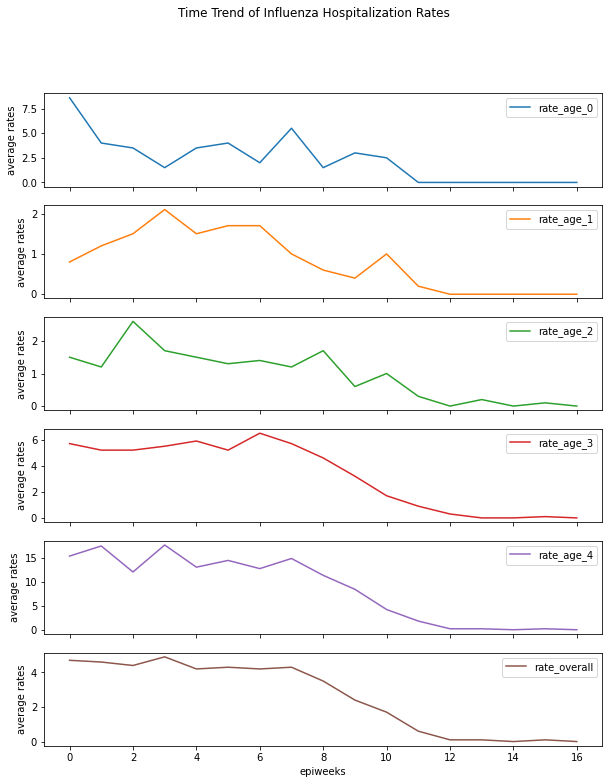

In [101]:
flusurvCA.plot(subplots=True, figsize=(10,12),
               xlabel="epiweeks",ylabel="average rates",
              title="Time Trend of Influenza Hospitalization Rates")

Then, we want to study time trend of influenza hospitalization rates for different age group in California over 2020 year. We drop the columns of 'release_date', 'location', 'issue', 'lag', 'epiweek' to create a new datafram named flusurvCA. Using code "plot" to visulize the time trend. From above graphs, we can see that they almost have the decreasing trend. There is a small difference in age groups between "5-24 years” and "25-50 years",they have increasing trend from week 1 to week 2. Overall, after week 4, the influenza hospitalization rates reduce quickly for every age group.  

2021 Data of Colorado

In [70]:
flusurv_param1 = FluSurvParams(
    epiweeks = ["201901-201917","201940-201952"], 
    regions = [FluSurvRegion.CO]
)
flusurv1=DataFetcher.fetch(EndpointType.FLUSURV,param=flusurv_param1)
flusurv1

,release_date,location,issue,epiweek,lag,rate_age_0,rate_age_1,rate_age_2,rate_age_3,rate_age_4,rate_overall
0,2020-01-10,CO,202001,201901,52,8.2,0.6,3.3,11.5,13.1,5.9
1,2020-01-17,CO,202002,201902,52,4.1,1.9,2.8,6.6,10.6,4.4
2,2020-01-24,CO,202003,201903,52,4.1,0.4,1.5,4.0,6.7,2.6
3,2020-01-31,CO,202004,201904,52,5.3,1.1,0.8,3.8,5.8,2.3
4,2020-02-07,CO,202005,201905,52,6.5,0.6,0.8,3.0,4.2,1.9
5,2020-02-14,CO,202006,201906,52,5.9,1.3,0.5,3.2,8.6,2.5
6,2020-02-21,CO,202007,201907,52,7.1,0.9,0.6,4.0,8.9,2.7
7,2020-02-28,CO,202008,201908,52,3.5,2.4,1.3,3.2,15.9,3.8
8,2020-03-06,CO,202009,201909,52,5.9,2.8,1.8,4.4,15.0,4.4
9,2020-03-13,CO,202010,201910,52,12.4,2.4,1.7,5.0,20.6,5.5


In [74]:
flusuraverage1=flusurv1.sum()[['rate_age_0','rate_age_1','rate_age_2','rate_age_3','rate_age_4']]/30
flusuraverage1

rate_age_0    3.386667
rate_age_1    0.913333
rate_age_2         0.9
rate_age_3    2.636667
rate_age_4        6.63
dtype: object

<ipython-input-75-719ca84fbceb>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_axes([0,0,1,1])


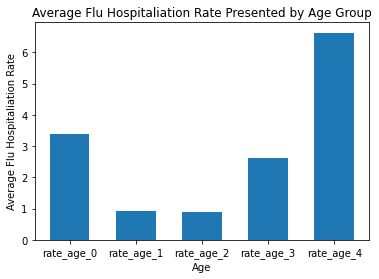

In [75]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
age1 = ['rate_age_0','rate_age_1','rate_age_2','rate_age_3','rate_age_4']
average_rate1  = [ 3.386667,0.913333,0.9,2.636667,6.63]
plt.bar(age1, average_rate1,
        width = 0.6)
plt.xlabel("Age")
plt.ylabel("Average Flu Hospitaliation Rate")
plt.title("Average Flu Hospitaliation Rate Presented by Age Group")
plt.show()

Then, we want to study the same question for Colorado. Since FLuSurve does not contain 2021 year data for Colorado, so we study average influenza hospitalization rates in 2019 year, and 2019 data has 30 weeks with missing value between 17 and 40 weeks. Thus, we choose "201901-201917" and "201940-201952" as the time range and used FluSurvRegion.CO to extract the data for Colorado. Then, we found the average influenza hospitalization rate for different age groups over the 30 weeks by summing the influenza hospitalization rates and dividing by 30. After doing this, we used matplotlib to plot the bar chat. Similarly, from the above graph, we can see that the highest mean influenza hospitalization rate is for people over 65 years old at 6.63, while the lowest mean influenza hospitalization rate is for people between "25-50 years" at 0.9, and average rate for people who are between "5-24 years" old close to people between 25-64 years old, which is 0.913333.